In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
df = pd.read_pickle('final_arr.pkl')
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,3,3,0.126191,0.087945,30.307967,0.035338
1,3,4,0.156117,0.129386,17.122613,0.025821
2,3,5,0.163829,0.140342,14.336400,0.027572
3,3,6,0.164359,0.144665,11.982358,0.018499
4,3,7,0.164633,0.152854,7.154491,0.013136
...,...,...,...,...,...,...
59,10,6,0.523945,0.477854,8.796917,0.019895
60,10,7,0.506476,0.470486,7.106030,0.015884
61,10,8,0.489866,0.461650,5.760066,0.011767
62,10,9,0.471914,0.445286,5.642562,0.010783


In [77]:
RI = np.array(df['mean_RI']).reshape([8,8])
ID = np.array(df['mean_initial_dist']).reshape([8,8])
FD = np.array(df['mean_final_dist']).reshape([8,8])

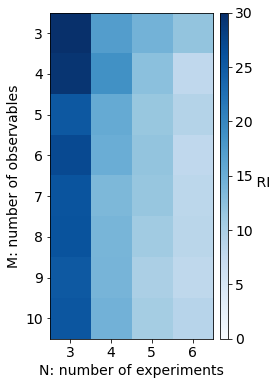

In [63]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
arr = RI[:,0:4]
im = ax.imshow(arr, cmap='Blues', vmin=0, vmax=30)
ax.set_xticks(np.arange(0,arr.shape[1]))
ax.set_yticks(np.arange(0,arr.shape[0]))
ax.set_xticklabels(3+np.arange(0,arr.shape[1]))
ax.set_yticklabels(3+np.arange(0,arr.shape[0]));
ax.set_xlabel('N: number of experiments')
ax.set_ylabel('M: number of observables');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)
cax.set_ylabel('   RI', rotation=0);

## Functions of M

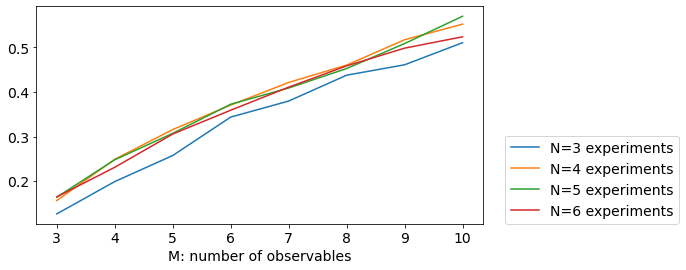

In [176]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], label='N=%d experiments' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));

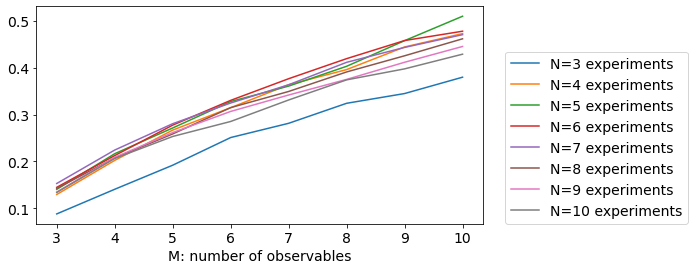

In [81]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(FD[:,i], label='N=%d experiments' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));

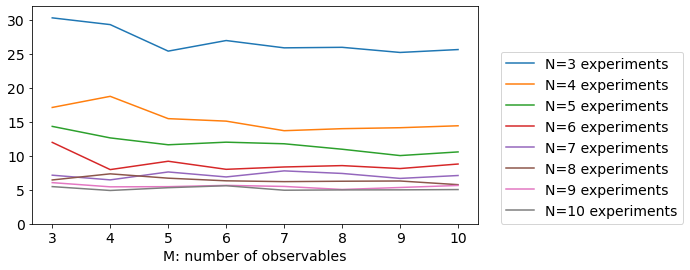

In [83]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(RI[:,i], label='N=%d experiments' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_ylim(0,32);
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(0,8));

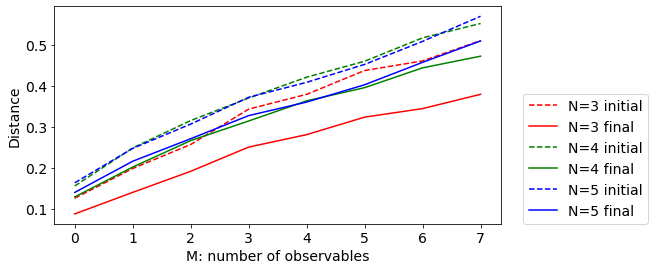

In [178]:
colors = ['r', 'g', 'b', 'c', 'm', 'y','gray','k']
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(ID[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+3))
    ax.plot(FD[:,i], ls='-', color=colors[i], label='N=%d final' %(i+3))
ax.legend(loc=[1.05,0]);
ax.set_ylabel('Distance')
ax.set_xlabel('M: number of observables');

## Different normalization

In [91]:
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,3,3,0.126191,0.087945,30.307967,0.035338
1,3,4,0.156117,0.129386,17.122613,0.025821
2,3,5,0.163829,0.140342,14.336400,0.027572
3,3,6,0.164359,0.144665,11.982358,0.018499
4,3,7,0.164633,0.152854,7.154491,0.013136
...,...,...,...,...,...,...
59,10,6,0.523945,0.477854,8.796917,0.019895
60,10,7,0.506476,0.470486,7.106030,0.015884
61,10,8,0.489866,0.461650,5.760066,0.011767
62,10,9,0.471914,0.445286,5.642562,0.010783


In [148]:
IDN = np.array(df['mean_initial_dist'] / np.sqrt(df['M'])).reshape([8,8])
FDN = np.array(df['mean_final_dist'] / np.sqrt(df['M'])).reshape([8,8])

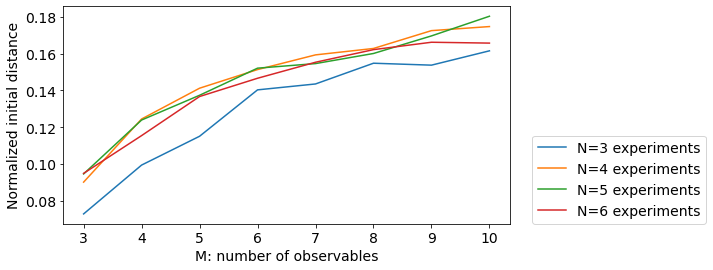

In [146]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[:,i], label='N=%d experiments' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

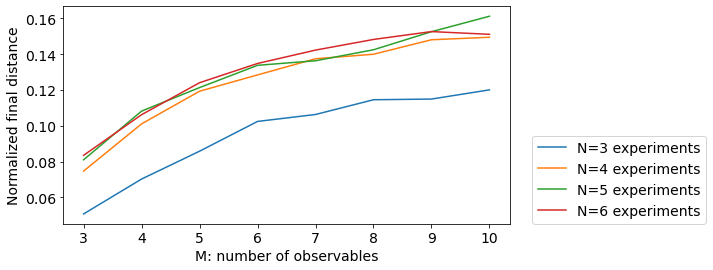

In [145]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[:,i], label='N=%d experiments' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

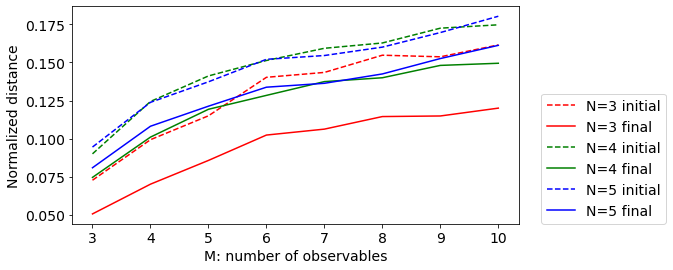

In [137]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+3))
    ax.plot(FDN[:,i], ls='-', color=colors[i], label='N=%d final' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

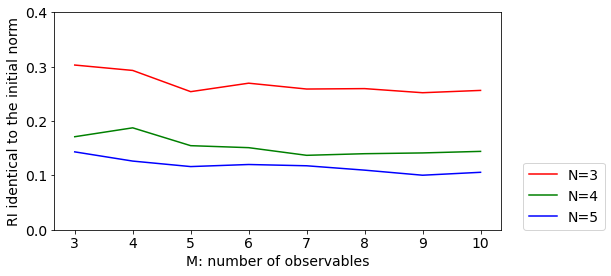

In [162]:
# Relative improvement is identical to the initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot((IDN[:,i]-FDN[:,i])/IDN[:,i], ls='-', color=colors[i], label='N=%d' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
ax.set_ylim(0.0,0.4);
ax.set_ylabel('RI');

## Functions of N

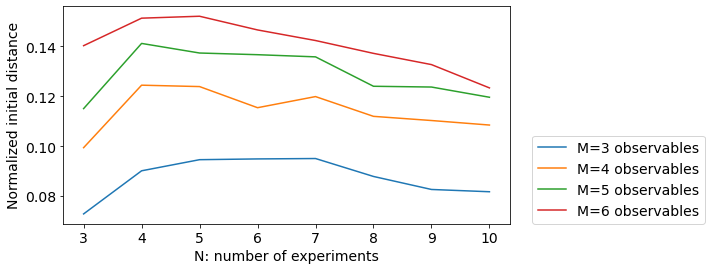

In [164]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[i], label='M=%d observables' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

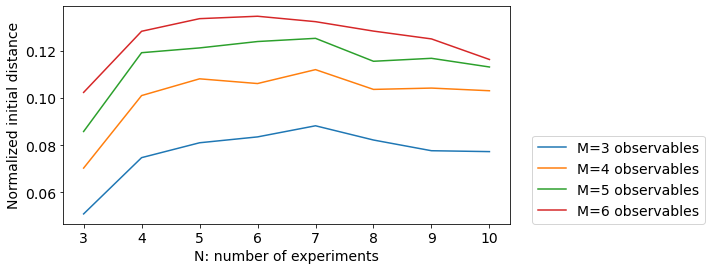

In [166]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[i], label='M=%d observables' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

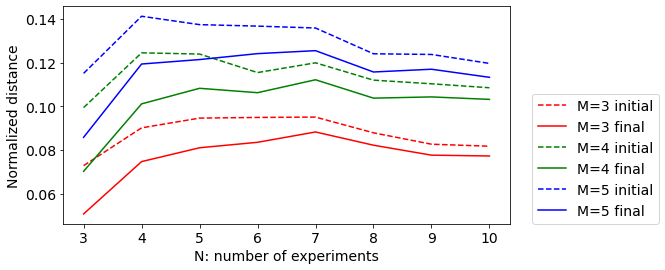

In [172]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[i], ls='--', color=colors[i], label='M=%d initial' %(i+3))
    ax.plot(FDN[i], ls='-', color=colors[i], label='M=%d final' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

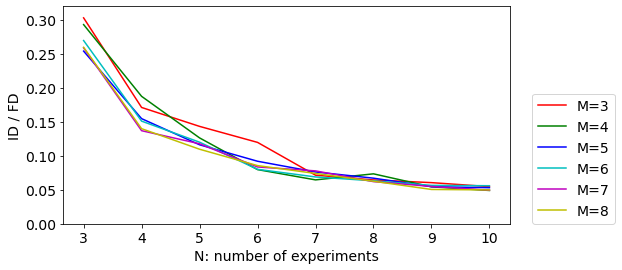

In [174]:
# Relative improvement

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((IDN[i]-FDN[i])/IDN[i], ls='-', color=colors[i], label='M=%d' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
ax.set_ylim(0.0,0.32);
ax.set_ylabel('ID / FD');

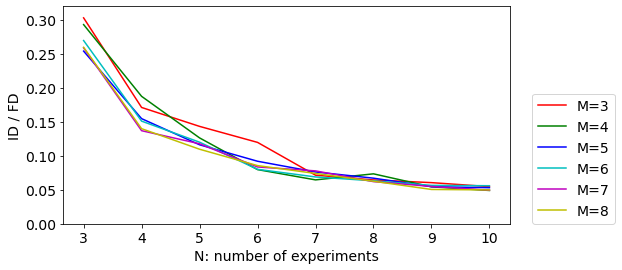

In [175]:
# The same with initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((ID[i]-FD[i])/ID[i], ls='-', color=colors[i], label='M=%d' %(i+3))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(3+np.arange(8));
ax.set_ylim(0.0,0.32);
ax.set_ylabel('ID / FD');